# Investigate the aperture correction for GAAP

In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
import time
import matplotlib.pyplot as plt
import lsst.meas.base
import lsst.pex.config

import lsst.afw.table
import lsst.meas.algorithms
import lsst.pex.exceptions
import lsst.meas.extensions.gaap

In [2]:
from astropy.io import fits
from astropy.table import Table, hstack
import sys
sys.path.append('/home/jiaxuanl/Research/Merian/lambo/scripts/')

get existing patches

In [3]:
import os
old_patches = [name for name in os.listdir(
    "/projects/MERIAN/repo/S20A/deepCoadd_calexp/9813/")]
new_patches = [int(name[0]) + int(name[2]) * 9 for name in old_patches]
merian_patches = [int(name) for name in os.listdir(
    "/projects/MERIAN/repo/DECam/runs/merian/dr1_wide/20220921T193246Z/deepCoadd_forced_src/9813")]
common_patches = np.intersect1d(new_patches, merian_patches)

rsync -azv --progress jiaxuanl@tiger.princeton.edu://projects/MERIAN/repo/S20A/gaapTable/9813/6,2/gaapTable_I_9813_6,2.fits ./

In [4]:
common_patches[20:23]

array([23, 24, 25])

In [5]:
from hsc_gaap.gaap import GaapTask, consolidateMerianCats, NaiveLogger

Overriding default configuration file with /scratch/gpfs/HSC/LSST/stack_20230302/conda/envs/lsst-scipipe-4.0.1/share/eups/Linux64/dustmaps_cachedata/g41a3ec361e+ac198e9f13/config/.dustmapsrc


In [38]:
import lsst.daf.butler as dafButler
butler = dafButler.Butler('/projects/MERIAN/repo/')

filt = 'N708'
# filt = 'N540'
tract = 9813
patch = 21
patch_old = f'{patch % 9},{patch // 9}'

dataId = dict(tract=tract, patch=patch, band=filt)

refCatObj = butler.get(
    'deepCoadd_forced_src',
    collections='DECam/runs/merian/dr1_wide',
    dataId=dataId,
    instrument='DECam',
    skymap='hsc_rings_v1',
)

# refExposure = butler.get(
#     'deepCoadd_calexp',
#     collections='DECam/runs/merian/dr1_wide',
#     dataId=dataId,
#     instrument='DECam',
#     skymap='hsc_rings_v1',
# )

In [13]:
fn = '/scratch/gpfs/jiaxuanl/Data/Merian/Catalogs/stars/hsc_merian_n708_n540_deep_cosmos_isolated_pts_calib_use.fits'
star_cat = Table.read(fn)
star_cat = star_cat[star_cat['hsc_patch'] == patch]

In [14]:
len(star_cat)

37

In [ ]:
base_PsfFlux_apCorr
modelfit_CModel_apCorr

12 pix scale for PSF size


In [62]:
extendedness = refCatObj['base_ClassificationExtendedness_value']
flag = (extendedness == 0.0)

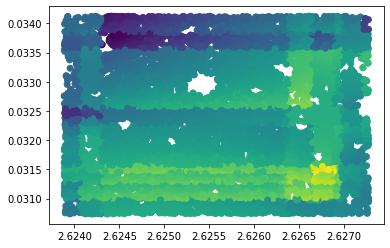

In [63]:
plt.scatter(refCatObj['coord_ra'][flag], 
            refCatObj['coord_dec'][flag], 
            c=refCatObj['modelfit_CModel_apCorr'][flag])

In [ ]:
plt.scatter()

/tmp/ipykernel_26488/3110154465.py:1: RuntimeWarning: invalid value encountered in log10
  plt.scatter(31.4 -2.5 * np.log10(refCatObj['base_PsfFlux_instFlux']),


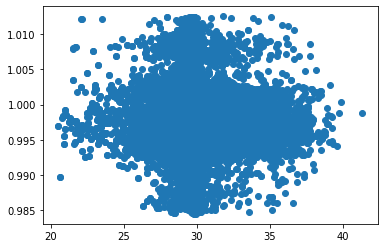

In [23]:
plt.scatter(31.4 - 2.5 * np.log10(refCatObj['base_PsfFlux_instFlux']), 
            refCatObj['base_PsfFlux_apCorr'])

In [34]:
temp = -2.5 * np.log10(refCatObj['base_PsfFlux_instFlux'] / refCatObj['modelfit_CModel_instFlux'])
# temp = np.nan_to_num(temp, 0)

/tmp/ipykernel_26488/3703326875.py:1: RuntimeWarning: divide by zero encountered in divide
  temp = -2.5 * np.log10(refCatObj['base_PsfFlux_instFlux'] / refCatObj['modelfit_CModel_instFlux'])
/tmp/ipykernel_26488/3703326875.py:1: RuntimeWarning: invalid value encountered in log10
  temp = -2.5 * np.log10(refCatObj['base_PsfFlux_instFlux'] / refCatObj['modelfit_CModel_instFlux'])


In [31]:
temp

array([0., 0., 0., ..., 0., 0., 0.])

In [ ]:
refCatObj['']

In [17]:
refCatObj.schema

Schema(
    (Field['L'](name="id", doc="unique ID"), Key<L>(offset=0, nElements=1)),
    (Field['Angle'](name="coord_ra", doc="position in ra/dec"), Key<Angle>(offset=8, nElements=1)),
    (Field['Angle'](name="coord_dec", doc="position in ra/dec"), Key<Angle>(offset=16, nElements=1)),
    (Field['L'](name="parent", doc="unique ID of parent source"), Key<L>(offset=24, nElements=1)),
    (Field['I'](name="deblend_nChild", doc="Number of children this object has (defaults to 0)"), Key<I>(offset=32, nElements=1)),
    (Field['D'](name="base_SdssCentroid_x", doc="centroid from Sdss Centroid algorithm", units="pixel"), Key<D>(offset=40, nElements=1)),
    (Field['D'](name="base_SdssCentroid_y", doc="centroid from Sdss Centroid algorithm", units="pixel"), Key<D>(offset=48, nElements=1)),
    (Field['F'](name="base_SdssCentroid_xErr", doc="1-sigma uncertainty on x position", units="pixel"), Key<F>(offset=56, nElements=1)),
    (Field['F'](name="base_SdssCentroid_yErr", doc="1-sigma uncertaint

In [ ]:
plt.scatter(-2.5 * np.log10(refCatObj['modelfit_CModel_initial_instFlux']), 
            -2.5 * np.log10(refCatObj['base_CircularApertureFlux_12_0_instFlux']))

/tmp/ipykernel_26488/1877353479.py:1: RuntimeWarning: invalid value encountered in log10
  plt.scatter(-2.5 * np.log10(refCatObj['modelfit_CModel_initial_instFlux'])[flag],
/tmp/ipykernel_26488/1877353479.py:2: RuntimeWarning: invalid value encountered in log10
  -2.5 * np.log10(refCatObj['base_CircularApertureFlux_12_0_instFlux'])[flag],


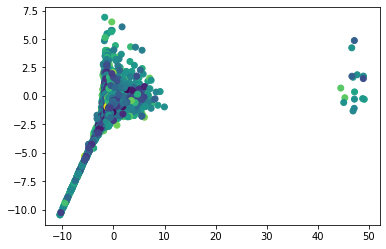

In [61]:
plt.scatter(-2.5 * np.log10(refCatObj['modelfit_CModel_initial_instFlux'])[flag], 
            -2.5 * np.log10(refCatObj['base_CircularApertureFlux_12_0_instFlux'])[flag],
            c=refCatObj['modelfit_CModel_apCorr'][flag])

In [69]:
refCatObj['ext_gaap_GaapFlux_1_15x_PsfFlux_flag_apCorr']

array([False, False, False, ..., False, False, False])

### Check HSC RC2

In [100]:
import lsst.daf.butler as dafButler
butler = dafButler.Butler('/projects/HSC/repo/main')

filt = 'i'
tract = 9813
patch = 20
patch_old = f'{patch % 9},{patch // 9}'

dataId = dict(tract=tract, patch=patch, band=filt)

refCatObj = butler.get(
    'deepCoadd_forced_src',
    collections='HSC/runs/RC2/w_2022_40/DM-36151',
    dataId=dataId,
    instrument='HSC',
    skymap='hsc_rings_v1',
)

# refCatObj = butler.get(
#     'objectTable',
#     collections='HSC/runs/RC2/w_2022_40/DM-36151',
#     dataId=dataId,
#     instrument='HSC',
#     skymap='hsc_rings_v1',
# )

# refExposure = butler.get(
#     'deepCoadd_calexp',
#     collections='DECam/runs/merian/dr1_wide',
#     dataId=dataId,
#     instrument='DECam',
#     skymap='hsc_rings_v1',
# )

Text(0, 0.5, 'Dec')

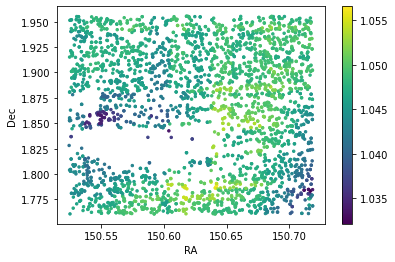

In [101]:
pts_flag = (refCatObj['base_ClassificationExtendedness_value'] == 0.0)
plt.scatter(np.rad2deg(refCatObj[pts_flag]['coord_ra']), 
            np.rad2deg(refCatObj[pts_flag]['coord_dec']),
            c=refCatObj[pts_flag]['ext_gaap_GaapFlux_1_15x_1_0_apCorr'], 
            s=6
           )
plt.colorbar()
plt.xlabel('RA')
plt.ylabel('Dec')

Text(0, 0.5, 'Dec')

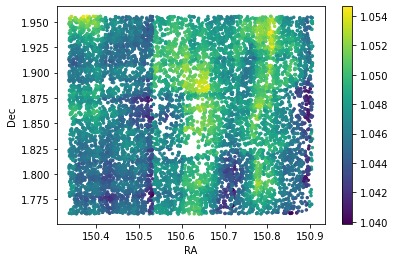

In [102]:
import lsst.daf.butler as dafButler
butler = dafButler.Butler('/projects/HSC/repo/main')

filt = 'i'
tract = 9813
for patch in [19, 20, 21]:
    patch_old = f'{patch % 9},{patch // 9}'

    dataId = dict(tract=tract, patch=patch, band=filt)

    refCatObj = butler.get(
        'deepCoadd_forced_src',
        collections='HSC/runs/RC2/w_2022_40/DM-36151',
        dataId=dataId,
        instrument='HSC',
        skymap='hsc_rings_v1',
    )
    pts_flag = (refCatObj['base_ClassificationExtendedness_value'] == 0.0)
    plt.scatter(np.rad2deg(refCatObj[pts_flag]['coord_ra']), 
                np.rad2deg(refCatObj[pts_flag]['coord_dec']),
                c=refCatObj[pts_flag]['ext_gaap_GaapFlux_1_15x_1_0_apCorr'], 
                s=6
               )

plt.colorbar()
plt.xlabel('RA')
plt.ylabel('Dec')

In [ ]:
-2.5 * np.log10(1.04), -2.5 * np.log10(1.054)

In [72]:
refCatObj['ext_gaap_GaapFlux_1_15x_1_0_apCorr']

array([1.04259959, 1.04260772, 1.04494239, ..., 1.04890594, 1.0475359 ,
       1.04891561])

In [73]:
refCatObj['ext_gaap_GaapFlux_1_15x_1_0_instFlux']

array([ 4.17728375,  2.92741291, 12.32915875, ...,  0.46211677,
        0.34440451,  0.99193252])

In [75]:
refCatObj['ext_gaap_GaapFlux_1_15x_1_0_flag_apCorr'].sum()

0

In [71]:
refCatObj.schema

Schema(
    (Field['L'](name="id", doc="unique ID"), Key<L>(offset=0, nElements=1)),
    (Field['Angle'](name="coord_ra", doc="position in ra/dec"), Key<Angle>(offset=8, nElements=1)),
    (Field['Angle'](name="coord_dec", doc="position in ra/dec"), Key<Angle>(offset=16, nElements=1)),
    (Field['L'](name="parent", doc="unique ID of parent source"), Key<L>(offset=24, nElements=1)),
    (Field['I'](name="deblend_nChild", doc="Number of children this object has (defaults to 0)"), Key<I>(offset=32, nElements=1)),
    (Field['D'](name="base_SdssCentroid_x", doc="centroid from Sdss Centroid algorithm", units="pixel"), Key<D>(offset=40, nElements=1)),
    (Field['D'](name="base_SdssCentroid_y", doc="centroid from Sdss Centroid algorithm", units="pixel"), Key<D>(offset=48, nElements=1)),
    (Field['F'](name="base_SdssCentroid_xErr", doc="1-sigma uncertainty on x position", units="pixel"), Key<F>(offset=56, nElements=1)),
    (Field['F'](name="base_SdssCentroid_yErr", doc="1-sigma uncertaint